In [ ]:
# load lib
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from torch.utils.data import DataLoader

import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# load data
train = torchvision.datasets.MNIST(root='/content/mnist', download=True, train=True, transform=torchvision.transforms.ToTensor())
test = torchvision.datasets.MNIST(root='/content/mnist', download=True, train=False, transform=torchvision.transforms.ToTensor())

In [ ]:
train_loader = DataLoader(train, batch_size=60, shuffle=True)
test_loader = DataLoader(test, batch_size=60, shuffle=False)

In [ ]:
loader = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(loader)

In [ ]:
example_targets

tensor([7, 7, 8, 2, 1, 2, 2, 8, 8, 6, 9, 1, 7, 5, 7, 7, 8, 4, 8, 3, 6, 2, 8, 5,
        2, 8, 2, 7, 7, 7, 0, 0, 2, 9, 1, 6, 2, 2, 1, 9, 5, 4, 2, 2, 6, 6, 7, 3,
        8, 0, 8, 2, 4, 1, 2, 3, 2, 6, 8, 0])

(<matplotlib.image.AxesImage at 0x7a36fec04250>, tensor(6))

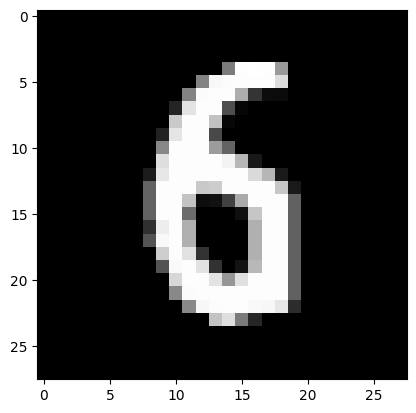

In [ ]:
i = 20
plt.imshow(example_data[i][0], cmap='gray'), example_targets[i]

In [ ]:
# need to build a nn

In [ ]:
class network(nn.Module):
  def __init__(self):
    super(network, self).__init__() # get all shit from parents
    self.layer1 = nn.Linear(28*28,100)
    self.layer2 = nn.Linear(100, 10)

  def forward(self,x):
    x = x.view(-1, 28*28)
    x = F.relu(self.layer1(x))
    x = self.layer2(x)
    return x

model = network()

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
with_activation = []
for epoch in range(10):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = model(data)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 100 == 0:
            print(f'Epoch {epoch+1}/{10}, Batch {batch_idx}/{len(train_loader)}, Loss: {loss.item():.4f}')
            with_activation.append(loss.item())

Epoch 1/10, Batch 0/1000, Loss: 0.2510
Epoch 1/10, Batch 100/1000, Loss: 0.1720
Epoch 1/10, Batch 200/1000, Loss: 0.1193
Epoch 1/10, Batch 300/1000, Loss: 0.3182
Epoch 1/10, Batch 400/1000, Loss: 0.4778
Epoch 1/10, Batch 500/1000, Loss: 0.4363
Epoch 1/10, Batch 600/1000, Loss: 0.1997
Epoch 1/10, Batch 700/1000, Loss: 0.1293
Epoch 1/10, Batch 800/1000, Loss: 0.0851
Epoch 1/10, Batch 900/1000, Loss: 0.1654
Epoch 2/10, Batch 0/1000, Loss: 0.2079
Epoch 2/10, Batch 100/1000, Loss: 0.2527
Epoch 2/10, Batch 200/1000, Loss: 0.1128
Epoch 2/10, Batch 300/1000, Loss: 0.3118
Epoch 2/10, Batch 400/1000, Loss: 0.1272
Epoch 2/10, Batch 500/1000, Loss: 0.0947
Epoch 2/10, Batch 600/1000, Loss: 0.1885
Epoch 2/10, Batch 700/1000, Loss: 0.1458
Epoch 2/10, Batch 800/1000, Loss: 0.0606
Epoch 2/10, Batch 900/1000, Loss: 0.1137
Epoch 3/10, Batch 0/1000, Loss: 0.0933
Epoch 3/10, Batch 100/1000, Loss: 0.0798
Epoch 3/10, Batch 200/1000, Loss: 0.0494
Epoch 3/10, Batch 300/1000, Loss: 0.1333
Epoch 3/10, Batch 400/

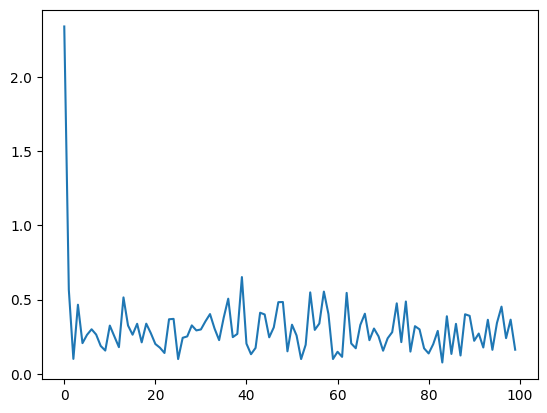

In [ ]:
plt.plot(without_activation)

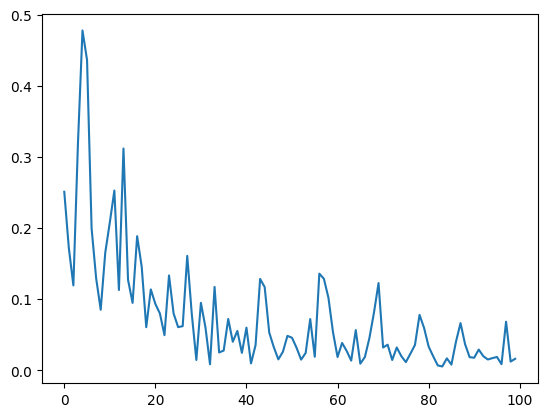

In [ ]:
plt.plot(with_activation)

In [ ]:
output = model(example_data[1][0])

In [ ]:
output

tensor([[ -3.0223, -14.2590,   2.3728,   6.5417,  -4.0145,   0.1515, -12.2334,
          14.4777,  -0.5801,   6.6054]], grad_fn=<AddmmBackward0>)

In [ ]:
output

tensor([[-13.1940,  -4.6547,   0.5413,  -2.0520, -16.1109, -10.3427, -21.2045,
          12.1960,  -7.4147,  -1.7207]], grad_fn=<AddmmBackward0>)

In [ ]:
output.argmax(dim=1, keepdim=True)

tensor([[7]])

In [ ]:
# evalute model

model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
  for data, target in test_loader:
    output = model(data)
    test_loss+=criterion(output, target).item()
    pred = output.argmax(dim=1, keepdim=True)
    correct+=pred.eq(target.view_as(pred)).sum().item()


test_loss /= len(test_loader.dataset)
accuracy = 100. * correct / len(test_loader.dataset)
print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({accuracy:.2f}%)')


Test set: Average loss: 0.0012, Accuracy: 9790/10000 (97.90%)


In [ ]:
from PIL import Image

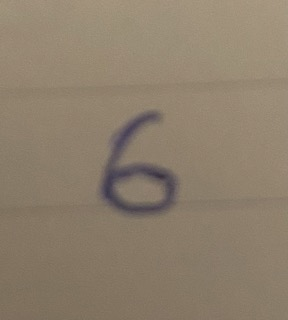

In [ ]:
image = Image.open('/content/IMG_5226 Small.jpeg')
image

In [ ]:
image.height, image.width

(320, 288)

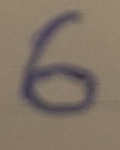

In [ ]:
left = 80     # Left coordinate
top =  100 # Top coordinate
right =  200  # Right coordinate
bottom =  250# Bottom coordinate

# Crop the image
image = image.crop((left, top, right, bottom))
image

In [ ]:
image = image.resize((28, 28))
image

In [ ]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),  # This also scales the image to [0, 1]
    torchvision.transforms.Grayscale(num_output_channels=1)
])

In [ ]:
img_tensor = transform(image)
img_tensor.shape

torch.Size([1, 28, 28])

In [ ]:
img_tensor[0] = 1 - img_tensor[0]

In [ ]:
threshold = 0.6
img_tensor[0] = (img_tensor[0] > threshold).float()

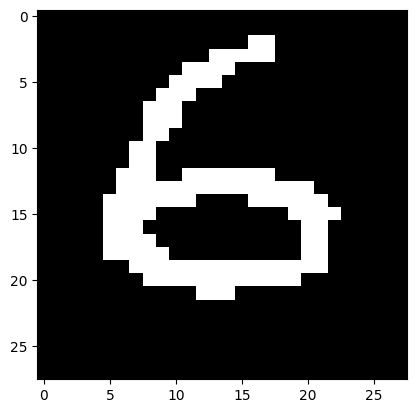

In [ ]:
plt.imshow(img_tensor[0], cmap='gray')

In [ ]:
model(img_tensor[0])

tensor([[ -8.0040, -13.9871,  -3.0731,  -7.0115,  -6.2650,   3.4938,  11.4566,
         -10.1217,  -7.5171, -18.2451]], grad_fn=<AddmmBackward0>)

In [ ]:
model(img_tensor[0]).argmax(dim=1, keepdim=True)

tensor([[6]])

In [ ]:
model(example_data[i][0])

tensor([[ -6.8022, -10.6727,  -9.7940,  -5.7649,  -4.9159,   3.6550,   8.3120,
         -14.9684,   2.4727,  -5.8640]], grad_fn=<AddmmBackward0>)